# 1. Import necessary Libraries

In [148]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
! pip install -i https://test.pypi.org/simple/ my-krml-24587139

Looking in indexes: https://test.pypi.org/simple/


In [150]:
import pandas as pd
import numpy as np

# 2. Load Dataset

In [151]:
X_train = pd.read_csv('../data/processed/X_train.csv').to_numpy()
X_val = pd.read_csv('../data/processed/X_val.csv').to_numpy()
X_test = pd.read_csv('../data/processed/X_test.csv').to_numpy()
y_train = pd.read_csv('../data/processed/y_train.csv')
y_val = pd.read_csv('../data/processed/y_val.csv')

In [152]:
y_train = y_train.squeeze()
y_val = y_val.squeeze()

# 3. Train SVM with Tuning Hyper Parameters

#### 3.1. With C Regularisation Paramter = 0.5

In [153]:
from sklearn.svm import SVC

In [154]:
svc = SVC(probability = True, class_weight='balanced', C=0.5)

In [155]:
clf = svc.fit(X_train, y_train)

In [156]:
from my_krml_24587139.data.sets import save_sets

In [157]:
save_sets(X_train, y_train, X_val, y_val, X_test, path='../data/processed/')

In [158]:
y_train_preds = svc.predict(X_train)
y_val_preds = svc.predict(X_val)

In [159]:
from my_krml_24587139.models.performance import print_regressor_scores_at1

In [160]:
print_regressor_scores_at1(X = X_train, y_actuals=y_train, model = svc, set_name='Training')

roc_auc_score for Training data: 0.993796811209174


In [161]:
print_regressor_scores_at1(X = X_val, y_actuals=y_val, model = svc, set_name='Validation')

roc_auc_score for Validation data: 0.9898442409552024


In [162]:
from my_krml_24587139.models.performance import predict_probability

In [163]:
y_score_test = predict_probability(X_test, clf)

In [164]:
y_score_test

array([0.00574162, 0.00574162, 0.00574162, ..., 0.00574162, 0.00574162,
       0.00574162])

In [165]:
player_id = pd.read_csv("../data/processed/player_id.csv")
player_id = player_id.drop(player_id.columns[0], axis=1)

In [166]:
df_scores = pd.concat({'': player_id, 'drafted': pd.Series(y_score_test)}, axis = 1)
df_scores

,,drafted
,player_id,0
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.005742
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.005742
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.005742
3,32402798-471c-4a54-8cb4-29cd95199014,0.005742
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.005742
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.005742
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.005742
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.005742


#### 3.1.1 Viewing ROC Results

In [167]:
!pip install matplotlib

In [168]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [169]:
y_score_train = predict_probability(X_train, clf)

In [170]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_score_train)

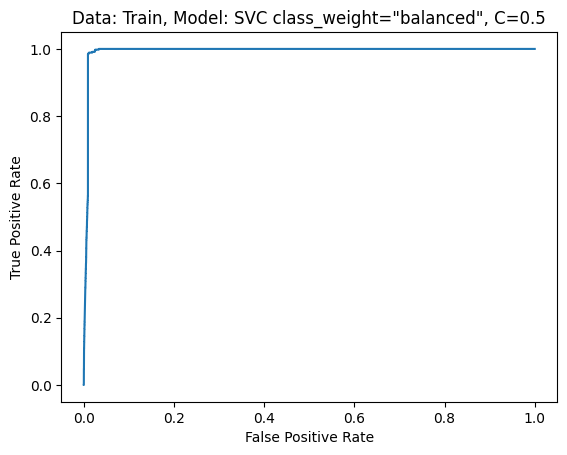

In [171]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Data: Train, Model: SVC class_weight="balanced", C=0.5')

plt.savefig('../reports/figures/Train_SVC_Weight_balanced_c_05.png')

In [172]:
y_score_val = predict_probability(X_val, clf)

In [173]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_score_val)

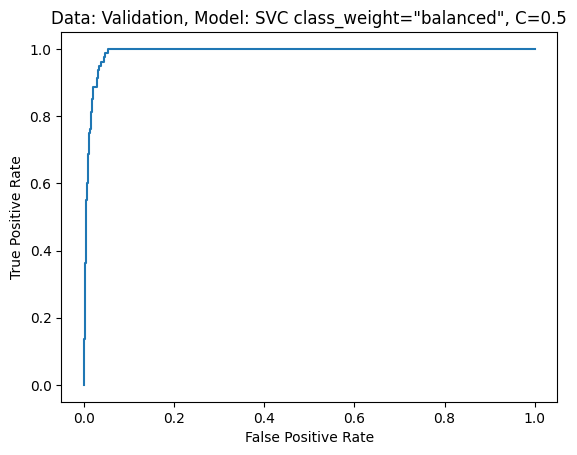

In [174]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Data: Validation, Model: SVC class_weight="balanced", C=0.5')

plt.savefig('../reports/figures/Validation_SVC_Weight_balanced_c_05.png')

#### 2.2. With weights = 'balanced', C Regularisation Parameter = 0.8

In [175]:
svc_1 = SVC(probability=True, class_weight='balanced', C = 0.8)

In [176]:
clf = svc_1.fit(X_train, y_train)

In [177]:
y_train_preds = svc_1.predict(X_train)
y_val_preds = svc_1.predict(X_val)

In [178]:
print_regressor_scores_at1(X = X_train, y_actuals=y_train, model = svc_1, set_name='Training')

roc_auc_score for Training data: 0.9947570310130062


In [179]:
print_regressor_scores_at1(X = X_val, y_actuals=y_val, model = svc_1, set_name='Validation')

roc_auc_score for Validation data: 0.9895766002334141


In [180]:
y_score_val = predict_probability(X_val, clf)

In [181]:
y_score_val

array([0.00495385, 0.00377144, 0.0029546 , ..., 0.00506215, 0.00014082,
       0.00138215])

In [182]:
player_id = pd.read_csv("../data/processed/player_id.csv")
player_id = player_id.drop(player_id.columns[0], axis=1)

In [183]:
y_score_test = predict_probability(X_test, clf)

In [184]:
y_score_test

array([0.0067555, 0.0067555, 0.0067555, ..., 0.0067555, 0.0067555,
       0.0067555])

In [185]:
df_scores = pd.concat({'': player_id, 'drafted': pd.Series(y_score_val)}, axis = 1)
df_scores

,,drafted
,player_id,0
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.004954
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.003771
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.002955
3,32402798-471c-4a54-8cb4-29cd95199014,0.002798
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.000032
...,...,...
11214,NaN,0.023645
11215,NaN,0.002246
11216,NaN,0.005062


In [186]:
df_scores = pd.concat({'': player_id, 'drafted': pd.Series(y_score_test)}, axis = 1)
df_scores

,,drafted
,player_id,0
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.006756
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.006756
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.006756
3,32402798-471c-4a54-8cb4-29cd95199014,0.006756
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.006756
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.006756
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.006756
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.006756


#### 2.2.1 Viewing ROC Results

In [187]:
y_score_train = predict_probability(X_train, clf)

In [188]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_score_train)

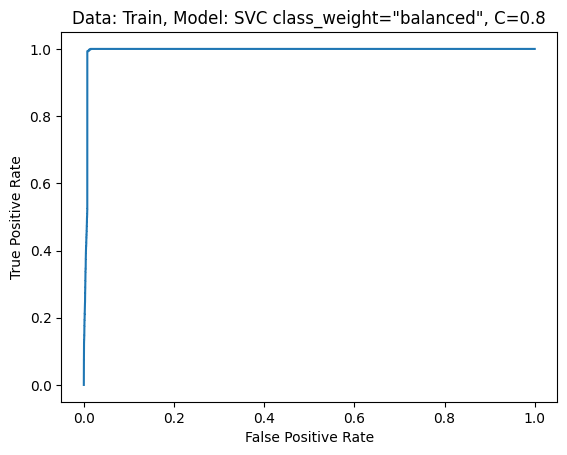

In [189]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Data: Train, Model: SVC class_weight="balanced", C=0.8')

plt.savefig('../reports/figures/Train_SVC_Weight_balanced_c_08.png')

In [190]:
y_score_val = predict_probability(X_val, clf)

In [191]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_score_val)

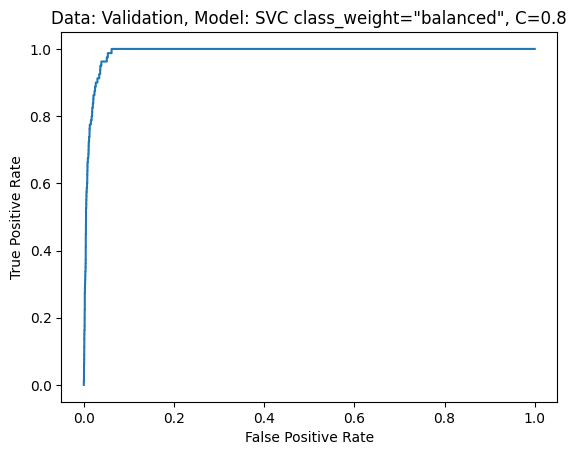

In [192]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Data: Validation, Model: SVC class_weight="balanced", C=0.8')

plt.savefig('../reports/figures/Validation_SVC_Weight_balanced_c_08.png')

# 4. Saving The Best Model

In [193]:
from joblib import dump

dump(svc_1,  '../models/svc_week3.joblib')

['../models/svc_week3.joblib']